In [1]:
import fenics as f
import matplotlib.pyplot as plt
from models import velocity_field, transient_t_transport_sim, mesh_2d, t_transport_sim
import numpy as np
import scipy

----------  Running for dT=0.1 K  ----------*** Warning: Matplotlib plotting backend does not support mesh function of dim 1. Continuing without plotting...

Running for factor=1.0e-03
No Jacobian form specified for nonlinear variational problem.
Differentiating residual form F to obtain Jacobian J = F'.
Solving nonlinear variational problem.
Running for factor=1.0e-02
  Newton iteration 0: r (abs) = 1.297e+05 (tol = 1.000e-09) r (rel) = 1.000e+00 (tol = 1.000e-09)
  Newton iteration 1: r (abs) = 4.258e-04 (tol = 1.000e-09) r (rel) = 3.283e-09 (tol = 1.000e-09)
  Newton iteration 2: r (abs) = 1.057e-10 (tol = 1.000e-09) r (rel) = 8.149e-16 (tol = 1.000e-09)
  Newton solver finished in 2 iterations and 2 linear solver iterations.
No Jacobian form specified for nonlinear variational problem.
Differentiating residual form F to obtain Jacobian J = F'.
Solving nonlinear variational problem.
Running for factor=1.0e-01
  Newton iteration 0: r (abs) = 3.500e-07 (tol = 1.000e-09) r (rel) = 1.00

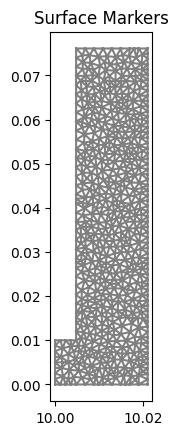

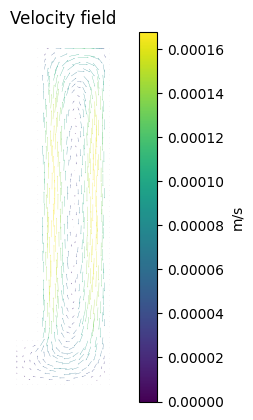

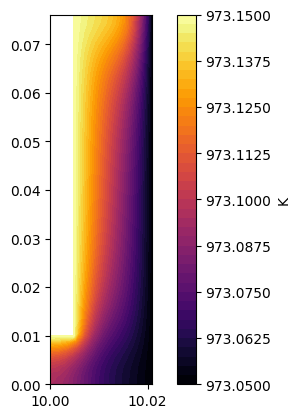

Defining initial values
Defining variational problem
Defining source terms
Defining boundary conditions
Time stepping...
100.0 %        5.0e+02 s    Ellapsed time so far: 1.3 s


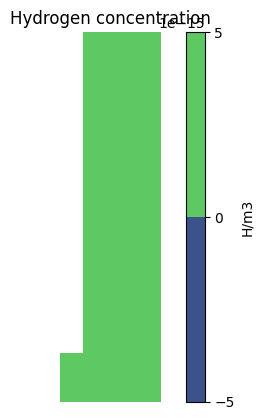

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0.]


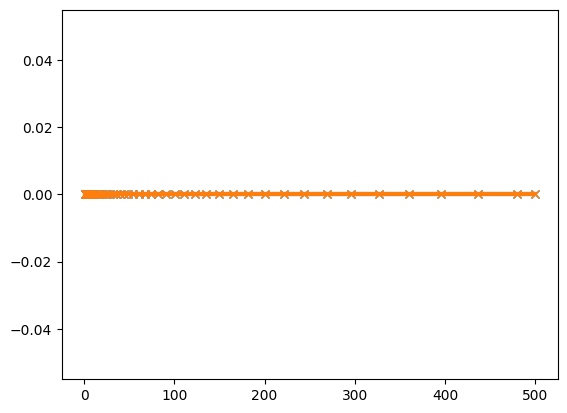

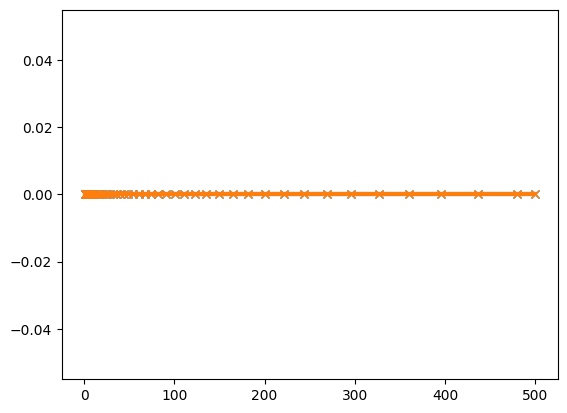

In [2]:
# Generating mesh
# x1 = 0.00476
# x2 = 0.0162
# y1 = 0.01
# y2 = 0.0761
# resolution = 30
# mesh_fenics, surface_markers, left_id, top_id, right_id, bottom_id, upper_left_id, left_top_id = LMeshmshr(x1, x2, y1, y2, resolution)

mesh_fenics, volume_markers, surface_markers, correspondance_dict = mesh_2d()

T_hot = 700 + 273.15
dT = 0.1
T_cold = T_hot - dT

print(f"----------  Running for dT={dT} K  ----------")
foldername = f"Results_Transient/dt={dT}/"
u, p, T = velocity_field(
    T_cold=T_cold,
    T_hot=T_hot,
    my_mesh=mesh_fenics,
    surface_markers=surface_markers,
    correspondance_dict=correspondance_dict,
)

f.XDMFFile(foldername + "temperature_field.xdmf").write_checkpoint(
    T, "temperature", 1, f.XDMFFile.Encoding.HDF5
)
f.XDMFFile(foldername + "velocity_field.xdmf").write(u)

plt.figure()
plt.title("Velocity field")
CS = f.plot(u, scale=1e-3)
plt.colorbar(CS, label="m/s")
plt.axis("off")
plt.show()

plt.figure()
TS = f.plot(T, cmap="inferno")
plt.colorbar(TS, label="K")
plt.show()

top_flux, wall_flux, t = transient_t_transport_sim(
    T,
    mesh_fenics,
    u,
    volume_markers=volume_markers,
    surface_markers=surface_markers,
    correspondance_dict=correspondance_dict,
)

plt.figure()
plt.plot(t, wall_flux, "-x", linewidth=3)
plt.plot(t, top_flux, "-x", linewidth=3)

wall_release = scipy.integrate.cumulative_trapezoid(wall_flux, t, initial=0)
top_release = scipy.integrate.cumulative_trapezoid(top_flux, t, initial=0)

plt.figure()
plt.plot(t, wall_release, "-x", linewidth=3)
plt.plot(t, top_release, "-x", linewidth=3)